## General Process

Create a dictionary to hold the match ratings and the counts of how often they occur

Use the All-Seasons.csv  
Select each game  

For the home team select the last 6 games from the date of the game
calculate the Superior Goal Rating = goals scored - goals conceded

For the away team select the last 6 games  
calculate the Superior Goal Rating = goals scored - goals conceded

Calculate the Match Rating = Home Superiority Rating - Away Superiority Rating  
** Note ** The "Away Superiority Rating" may be negative so may work out as e.g. 3 - (-3)

The Matching Rating should be added to the MatchRating{} dictionary If there is an existing MatchRating then increment its count


In [2]:
# Import Pandas Numpy and OS

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

print('Imports complete - pandas ready to use')


Imports complete - pandas ready to use


In [3]:
# Create an empty dictionary to hold the match ratings
# This will look like, a count for each  match rating
# MatchRatings = {'-1' : 10, '0' : 20, '1' : 10}

MatchRatings = {}
print(MatchRatings)


{}


In [4]:
# Create DF from All-Seasons.csv
try:
    all_seasons = pd.read_csv(r'data-csv\All-Seasons.csv', parse_dates=["Date"], dayfirst=True)
    print('All Seasons DataFrame created successfully')
except:
    print('Something went wrong - check file is not open in Excel or make sure you have run the imports')
    quit()

# sort by Date highest to lowest
all_seasons.sort_values(by=['Date'], ascending=False, inplace=True)


All Seasons DataFrame created successfully


In [6]:
# create functions to use in the calculations of the goal ratings

# this is a test function
def print_row():
     print(index, ' : ', row['Date'], row['HomeTeam'], row['AwayTeam'], row['FTHG'], row['FTAG'], row['FTR'])
     return

# Returns the last 6 matches from the date of the game for the selected team
def calc_current_form(pDate, pTeam):

    current_form = all_seasons.loc[ (all_seasons.Date < pDate) & ((all_seasons.HomeTeam == pTeam) | (all_seasons.AwayTeam == pTeam)) ].head(6)

    return current_form

# Calculate the goals diff between the goals scored/goals conceded for the current_form 
def sup_goal_rating(pCurrentForm, pTeam):

    Scored =  pCurrentForm.loc[((pCurrentForm.HomeTeam == pTeam)), 'FTHG'].sum()
    Scored += pCurrentForm.loc[((pCurrentForm.AwayTeam == pTeam)), 'FTAG'].sum()

    Conceded =  pCurrentForm.loc[((pCurrentForm.HomeTeam == pTeam)), 'FTAG'].sum()
    Conceded += pCurrentForm.loc[((pCurrentForm.AwayTeam == pTeam)), 'FTHG'].sum()

    # print(pTeam, ' - Scored : ', Scored, ' Conceded : ', Conceded)

    return (Scored - Conceded)

# If the MatchRating doesn't exist in the dictionary create it and give it a value of 0 then increment it
# if a MatchRating does exist then just increment it

def add_to_match_ratings(pMatchRating):

    MatchRatings[pMatchRating] = MatchRatings.get(pMatchRating, 0) + 1

    return

print('All Functions Created')


All Functions Created


In [7]:
# loop through each match in all_seasons dataframe
from datetime import datetime

#initialise empty lists to use to create the dictionary to store the H/W/D %
Ratings     = {}
HomeWins    = {}
AwayWins    = {}
Draws       = {}
HomeWinPer  = {}
AwayWinPer  = {}
DrawPer     = {}

print('Started Ratings Calculation', datetime.now())
print()

MatchRatings = {}
print(MatchRatings)

for index, row in all_seasons.iterrows():

    DT = row['Date']
    HT = row['HomeTeam']
    AT = row['AwayTeam']
    RE = row['FTR']
    
    # print_row()

    # calc superior goal rating for home team
    TeamAForm = calc_current_form(DT, HT)
    hsgr      = sup_goal_rating(TeamAForm, HT)
    
    # calc superior goal rating for away team
    TeamBForm = calc_current_form(DT, AT)
    asgr      = sup_goal_rating(TeamBForm, AT)

    # Calculate the Match Rating
    MatchRating = hsgr - asgr

    # print('Match Rating :', MatchRating)

    # add the match rating to the MatchRatings dictionary
    add_to_match_ratings(MatchRating)

    # Ratings[MatchRating] = Ratings.get(MatchRating, 0) + 1

    # add the ratings for each of Home, Away and Draw
    if RE == 'H':
        HomeWins[MatchRating] = HomeWins.get(MatchRating, 0) + 1
    elif RE == 'A':
        AwayWins[MatchRating] = AwayWins.get(MatchRating, 0) + 1
    elif RE == 'D':
        Draws[MatchRating] = Draws.get(MatchRating, 0) + 1

    # break

print()
print('Completed Ratings Calculation', datetime.now())



Started Ratings Calculation 2021-03-24 23:32:02.144157

{}

Completed Ratings Calculation 2021-03-24 23:36:49.794165


In [8]:
# create a dataframe from the MatchRatings dictionary
df_ratings = pd.DataFrame.from_dict(MatchRatings, orient='index', columns=['Count'])

# reset the index to be a column to that it can be plotted
df_ratings.reset_index(inplace=True)
df_ratings = df_ratings.rename(columns = {'index':'Rating'})

# sort by the Rating in ascending order
df_ratings.sort_values(by=['Rating'], inplace=True)

df_ratings


,Rating,Count
55,-39,1
57,-35,1
52,-30,1
58,-26,2
49,-25,2
34,-24,4
48,-23,4
45,-22,10
42,-21,16
22,-20,13


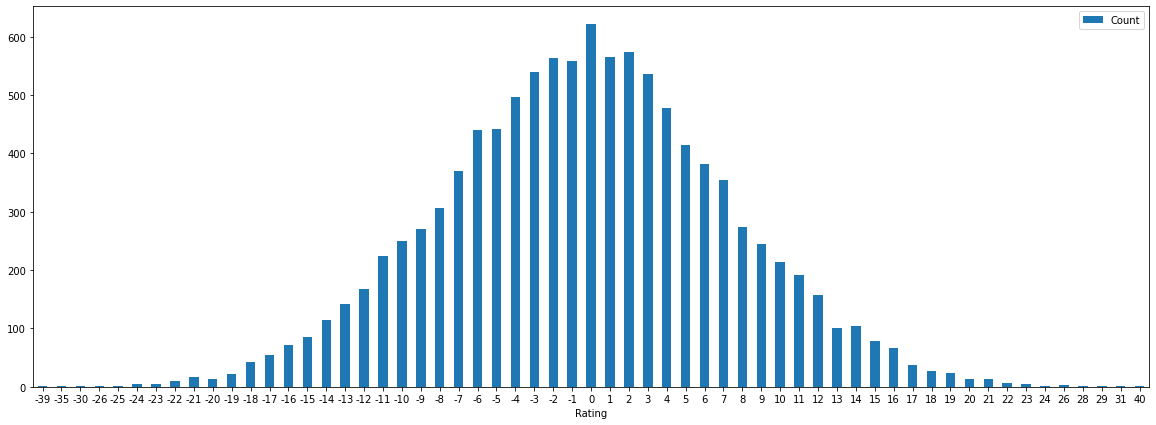

In [9]:
# plot the Ratings DataFrame as a Bar Chart

df_ratings.plot(x ='Rating', y='Count', kind='bar', figsize=[20,7], rot=0)
plt.show()


In [10]:
df_HomeWins = pd.DataFrame.from_dict(HomeWins, orient='index', columns=['Home Wins'])

# reset the index to be a column to that it can be plotted
df_HomeWins.reset_index(inplace=True)
df_HomeWins = df_HomeWins.rename(columns = {'index':'Rating'})

# sort by the Rating in ascending order
df_HomeWins.sort_values(by=['Rating'], inplace=True)

df_HomeWins


,Rating,Home Wins
51,-24,1
50,-22,1
47,-21,3
42,-20,3
46,-19,6
43,-18,7
39,-17,13
34,-16,15
28,-15,20
15,-14,27


In [11]:
df_AwayWins = pd.DataFrame.from_dict(AwayWins, orient='index', columns=['Away Wins'])

# reset the index to be a column to that it can be plotted
df_AwayWins.reset_index(inplace=True)
df_AwayWins = df_AwayWins.rename(columns = {'index':'Rating'})

# sort by the Rating in ascending order
df_AwayWins.sort_values(by=['Rating'], inplace=True)

df_AwayWins

,Rating,Away Wins
49,-39,1
50,-35,1
43,-30,1
51,-26,2
42,-25,2
22,-24,3
41,-23,2
38,-22,8
37,-21,8
39,-20,8


In [12]:
df_Draws = pd.DataFrame.from_dict(Draws, orient='index', columns=['Draws'])

# reset the index to be a column to that it can be plotted
df_Draws.reset_index(inplace=True)
df_Draws = df_Draws.rename(columns = {'index':'Rating'})

# sort by the Rating in ascending order
df_Draws.sort_values(by=['Rating'], inplace=True)

df_Draws

,Rating,Draws
40,-23,2
44,-22,1
39,-21,5
6,-20,2
45,-19,5
35,-18,8
8,-17,13
17,-16,19
37,-15,12
33,-14,35


In [13]:

rows = len(all_seasons.index)

df_history = df_ratings.merge(df_HomeWins, how='left', on='Rating')
df_history = df_history.merge(df_AwayWins, how='left', on='Rating')
df_history = df_history.merge(df_Draws, how='left', on='Rating')

df_history.fillna(0, inplace=True)

df_history["% Home"]  = ( (df_history['Home Wins'] / df_history['Count'] ) * 100 )
df_history["% Away"]  = ( (df_history['Away Wins'] / df_history['Count'] ) * 100 )
df_history["% Draws"] = ( (df_history['Draws']     / df_history['Count'] ) * 100 )

print(rows)
df_history.round(1)


10700


,Rating,Count,Home Wins,Away Wins,Draws,% Home,% Away,% Draws
0,-39,1,0.0,1.0,0.0,0.0,100.0,0.0
1,-35,1,0.0,1.0,0.0,0.0,100.0,0.0
2,-30,1,0.0,1.0,0.0,0.0,100.0,0.0
3,-26,2,0.0,2.0,0.0,0.0,100.0,0.0
4,-25,2,0.0,2.0,0.0,0.0,100.0,0.0
5,-24,4,1.0,3.0,0.0,25.0,75.0,0.0
6,-23,4,0.0,2.0,2.0,0.0,50.0,50.0
7,-22,10,1.0,8.0,1.0,10.0,80.0,10.0
8,-21,16,3.0,8.0,5.0,18.8,50.0,31.2
9,-20,13,3.0,8.0,2.0,23.1,61.5,15.4


In [14]:

print('Home Wins : ', df_history['Home Wins'].sum() )
print('Away Wins : ', df_history['Away Wins'].sum() )
print('Draws     : ', df_history['Draws'].sum() )
print('Total     : ', (df_history['Home Wins'].sum()) + (df_history['Away Wins'].sum()) + (df_history['Draws'].sum()) )


Home Wins :  4917.0
Away Wins :  3009.0
Draws     :  2774.0
Total     :  10700.0


In [15]:
df_history[0:30]

,Rating,Count,Home Wins,Away Wins,Draws,% Home,% Away,% Draws
0,-39,1,0.0,1.0,0.0,0.000000,100.000000,0.000000
1,-35,1,0.0,1.0,0.0,0.000000,100.000000,0.000000
2,-30,1,0.0,1.0,0.0,0.000000,100.000000,0.000000
3,-26,2,0.0,2.0,0.0,0.000000,100.000000,0.000000
4,-25,2,0.0,2.0,0.0,0.000000,100.000000,0.000000
5,-24,4,1.0,3.0,0.0,25.000000,75.000000,0.000000
6,-23,4,0.0,2.0,2.0,0.000000,50.000000,50.000000
7,-22,10,1.0,8.0,1.0,10.000000,80.000000,10.000000
8,-21,16,3.0,8.0,5.0,18.750000,50.000000,31.250000
9,-20,13,3.0,8.0,2.0,23.076923,61.538462,15.384615


<AxesSubplot:xlabel='Rating', ylabel='% Draws'>

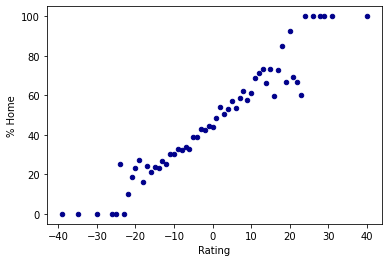

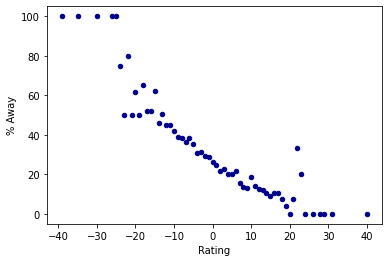

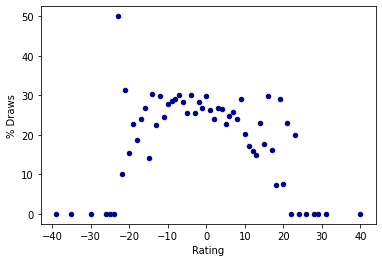

In [16]:
df_history.plot.scatter(x='Rating', y='% Home',  c='DarkBlue')
df_history.plot.scatter(x='Rating', y='% Away',  c='DarkBlue')
df_history.plot.scatter(x='Rating', y='% Draws', c='DarkBlue')

In [17]:
all_seasons['FTR'].value_counts()

H    4917
A    3009
D    2774
Name: FTR, dtype: int64

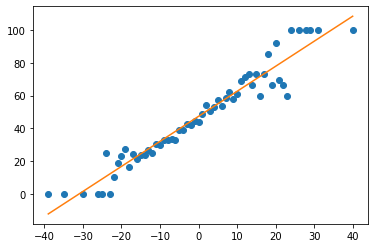

In [19]:
#create data
#df_history.plot.scatter(x='Rating', y='% Home',  c='DarkBlue')

# x = np.array([1, 1, 2, 3, 4, 4, 5, 6, 7, 7, 8, 9])
# y = np.array([13, 14, 17, 12, 23, 24, 25, 25, 24, 28, 32, 33])

x = np.array(df_history['Rating'])
y = np.array(df_history['% Home'])

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


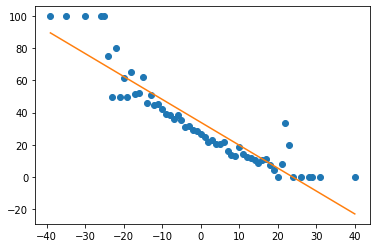

In [20]:
x = np.array(df_history['Rating'])
y = np.array(df_history['% Away'])

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

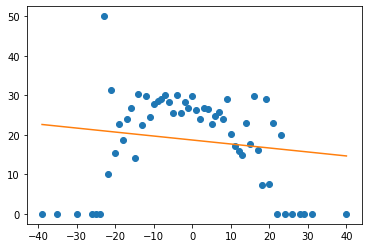

In [21]:
x = np.array(df_history['Rating'])
y = np.array(df_history['% Draws'])

#create basic scatterplot
plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)